<h1> Tracking and Anlayzing Hurricane Data Using PANDAS </h1>
<h3> Ian Russell | December 2018  </h3>
<h3> Introduction </h3>
<p> 
    The goal of this analysis will be to model hurricane data in order to track hurricanes throughout US history. Exploratory analysis of hurricane data will be an important intial step in studying hurricane patterns. Once the data is effectively cleaned and explored it may prove useful in generating predictive models for future hurricanes.
<p>
    
<h3>Procedure</h3>

In [2]:
import pandas as pd
import numpy as np
import altair as alt

In [3]:
# Importing the data

# list of column names to use
names = ["date","time","record_id","status","latitude", "longitude", "max_wind", "min_pressure" , "ne34ktr", "se34ktr", "sw34ktr", "nw34ktr" , "ne50ktr", "se50ktr", "sw50ktr", "nw50ktr", "ne64ktr", "se64ktr", "sw64ktr", "nw64ktr"]

# read in data
data = pd.read_csv("hurdat.txt",
                   header = None,
                   names = names,
                   skipinitialspace=True)

data.head()


,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,se34ktr,sw34ktr,nw34ktr,ne50ktr,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0000,NaN,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,18510625,0600,NaN,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,18510625,1200,NaN,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,18510625,1800,NaN,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


<h3> Cleaning: Extracting and Filling Identifiers</h3>
<p>
After importing the data there now remains an issue: each hurrican identifier entry is mixed in with all of the rows that contain the respective hurricane's tracking information. It will be neccesary to tack this single identifier at the top of each tracking set of points to each row of tracking points; then remove the original identifier row. Accomplishing this task will require four steps. 
</p>
<ul>
    <li>
        Step 1: Extract out those rows with the identifier, name, and number of points, and put           them in new columns named named identifier, name, and num_pts.
    </li>
    <li>
        Step 2: Fill in this information for the tracking points.
    </li>
      <li>
        Step 3: Remove the rows that just contain identifier information
    </li>
     <li>
        Step 4: Move the new columns to the front of the data frame.
    </li>
 
 
    
</ul>


In [4]:
# Extraction and filling


# extract identifiers
identities = data[["status"]].isnull()

# find locations of each identifier in OG dataset
nameRowLocations = identities.index[identities['status'] == True].tolist()

# create new dataframe with appropriate columns, 'setup row'
newdf = data.iloc[[0]]

# append each unique identifier
for i in nameRowLocations:

    newdf = newdf.append(data.iloc[[i]])
    
# ids is identifiers dataframe
ids = newdf.iloc[1:]  # Delete first 'setup row'

# trim off all other columns
ids = ids.dropna(axis='columns')

# reindex to match dimensions
idx= pd.Series(list(range(0,52150)))
ids = ids.reindex(idx)

# fill in NaN's
ids = ids.fillna(method = 'ffill')


# rename approriately
ids.columns = ['identifier', 'name', 'record_id']

# concatenate columns together
df = pd.concat([ids,data],axis=1)

# remove all rows that would be where the unique identifier is present
df=df[~df['status'].isnull()]

# get column names to rename
cols = list(df)

# remove duplicate 'record_id'
cols[2] = 'num_pts'

# rename all columns appropriately
df.columns = cols

df.head()

,identifier,name,num_pts,date,time,record_id,status,latitude,longitude,max_wind,...,sw34ktr,nw34ktr,ne50ktr,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr
1,AL011851,UNNAMED,14,18510625,0000,NaN,HU,28.0N,94.8W,80.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,AL011851,UNNAMED,14,18510625,0600,NaN,HU,28.0N,95.4W,80.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,AL011851,UNNAMED,14,18510625,1200,NaN,HU,28.0N,96.0W,80.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,AL011851,UNNAMED,14,18510625,1800,NaN,HU,28.1N,96.5W,80.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,AL011851,UNNAMED,14,18510625,2100,L,HU,28.2N,96.8W,80.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


<h3> Cleaning: Removal and Conversion of Bad Values </h3>
<p>
Much of the data set still contains many non-useful values that need to be dealt with. The purpose of these actions is to remove any values that would make computation difficult.
</p>
<ul>
    <li>
        Step 1: "UNNAMED" hurricane name values must be replaced with NaN values.
    </li>
    <li>
        Step 2: Any -999 pressure record must also be replaced with NaN      values.
    </li>
      <li>
        Step 3: Each date and time entry need be converted to a timestamp format.
    </li>
     <li>
        Step 4: Latitude and longitude values must be converted to numeric representations.
    </li>
 
 
    
</ul>



<h3> Names and Pressure Values </h3>
<p> This cleanup is easy with a simple sweep and replace method applied to the dataframe.

In [5]:
# replace specified cases with NaN
df = df.replace("UNNAMED", np.nan)
df = df.replace(-999, np.nan)


<h3> Dates </h3>
<p>
The orignial datetime information was formated as a string. It will be neccesary at this point to convert from a string to a PANDAS Timestamp type. Doing this will allow for operations on those data. 
</p>

In [6]:

# concat date and time into datetime
df['datetime'] = df['date'].map(str)+df['time'].map(str)

# remove old date and time columns
df =df.drop(['date','time'], axis =1)

# convert to date format
df['datetime'] = pd.to_datetime(df['datetime'])


# reorder columns

# this list was gathered from list(df)
df = df[['identifier',
 'name',
 'num_pts',
 'datetime',
 'record_id',
 'status',
 'latitude',
 'longitude',
 'max_wind',
 'min_pressure',
 'ne34ktr',
 'se34ktr',
 'sw34ktr',
 'nw34ktr',
 'ne50ktr',
 'se50ktr',
 'sw50ktr',
 'nw50ktr',
 'ne64ktr',
 'se64ktr',
 'sw64ktr',
 'nw64ktr',
 ]]

<h3> Latitudes and Longitudes </h3>
<p> 
Converting the latitudes and longitudes is a slightly less straightfoward process. The first issue with this conversion is the designation of direction. To differentiate between north and south and east and west a 1 or -1 (respectively) are multiplied into the values presented. This will allow a purely numeric conversion to occur over this column.
</p>


In [7]:


# Get multipliers for latitude and longitude columns

lats = df['latitude']
latDirections = lats.str.slice(start=-1)

d = {'N': 1, 'S': -1}

latDirections = latDirections.map(d)

longs = df['longitude']
longDirections = longs.str.slice(start=-1)


c = {'E': 1, 'W': -1}

longDirections = longDirections.map(c)




# Remove compass directions from original set

df[["latitude"]] = df["latitude"].str.slice(stop = -1)
df[["longitude"]] = df["longitude"].str.slice(stop = -1)

# reassigned because sometimes I was having issues when re-running code
edit1 = df


In [8]:

# multiply in direction magnitudes
edit1.longitude = edit1.longitude.astype('float64')*longDirections
edit1.latitude = edit1.latitude.astype('float64')*latDirections

In [9]:
final = edit1
final.head()

,identifier,name,num_pts,datetime,record_id,status,latitude,longitude,max_wind,min_pressure,...,sw34ktr,nw34ktr,ne50ktr,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr
1,AL011851,NaN,14,1851-06-25 00:00:00,NaN,HU,28.0,-94.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL011851,NaN,14,1851-06-25 06:00:00,NaN,HU,28.0,-95.4,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL011851,NaN,14,1851-06-25 12:00:00,NaN,HU,28.0,-96.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL011851,NaN,14,1851-06-25 18:00:00,NaN,HU,28.1,-96.5,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AL011851,NaN,14,1851-06-25 21:00:00,L,HU,28.2,-96.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
final.to_csv("final.csv", sep=',')

<h3> Exploration</h3>

<p> Now that the final data set has been cleaned up, it is now possible to begin to explore the data set and look for relavent information or trends.
The first visualization conducted layers the trajectory of hurricane Maria over a map of the united states for geographic comparsion. This process is shown in the cells below.
</p>

In [11]:
alt.data_transformers.enable('csv')

from vega_datasets import data

states_data = alt.topo_feature(data.us_10m.url, 'states')
states = alt.Chart(states_data).mark_geoshape(
        fill='lightgray',
        stroke='black',
        strokeWidth=1
    ).transform_filter((alt.datum.id != 2) & (alt.datum.id != 15))


In [12]:
states;

In [13]:
# Plot data
visual = alt.Chart('final.csv').mark_line().encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    order = "datetime:O"
).transform_filter((alt.datum.datetime > '2017-01-01') & (alt.datum.name == 'MARIA'))


In [18]:
visual + states;

In [15]:
finalUnique = final.drop_duplicates('identifier')

/home/ian/.local/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


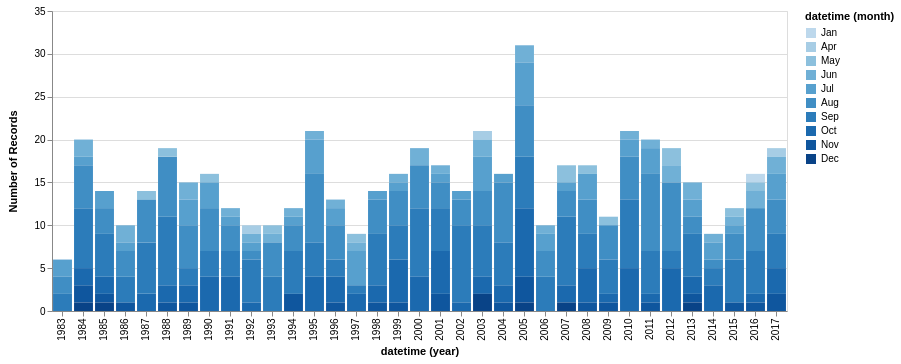

In [19]:
recent = finalUnique[finalUnique['datetime'].dt.year > 1982]

alt.Chart(recent).mark_bar().encode(
    x='year(datetime):O',
    y='count(identifier)',
    color='month(datetime):O'
)

/home/ian/.local/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


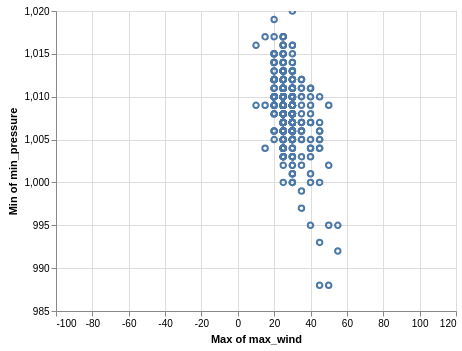

In [17]:
alt.Chart(finalUnique).mark_point().encode(
    x=alt.X('max(max_wind):Q', scale = alt.Scale(zero=False)),
    y=alt.Y('min(min_pressure):Q', scale = alt.Scale(zero=False)),
    detail='identifier'
).transform_filter(alt.datum.min_pressure != -999).interactive()